## Random Forest Model for Companies Sales-Categorical Target Variable

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("ggplot")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [2]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Check for Duplicates

In [5]:
df.duplicated().sum()

0

### Check for Outliers

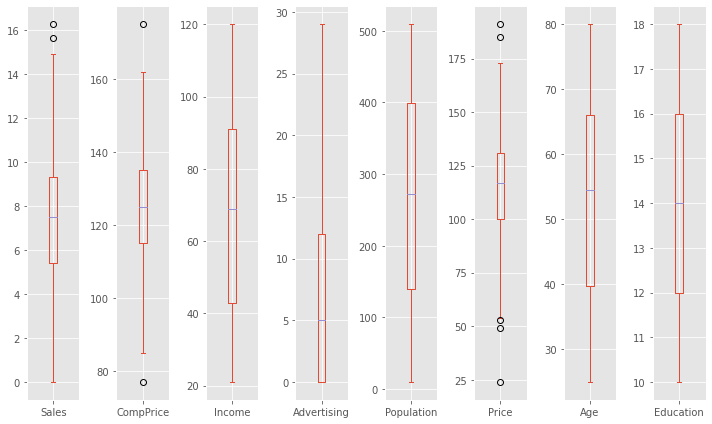

In [6]:
df.plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout();

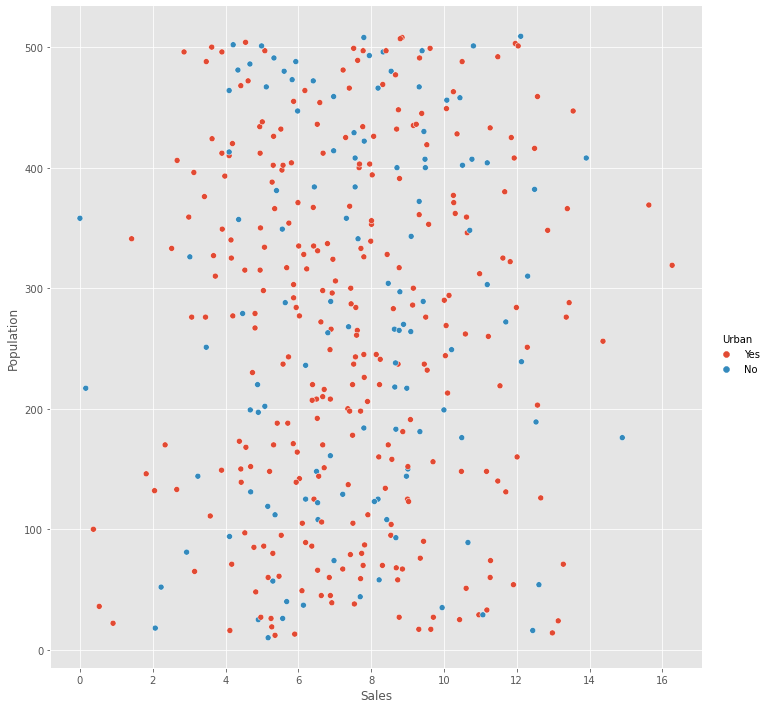

In [7]:
sns.pairplot(data=df,x_vars="Sales",y_vars="Population",hue="Urban",height=10,aspect=1);

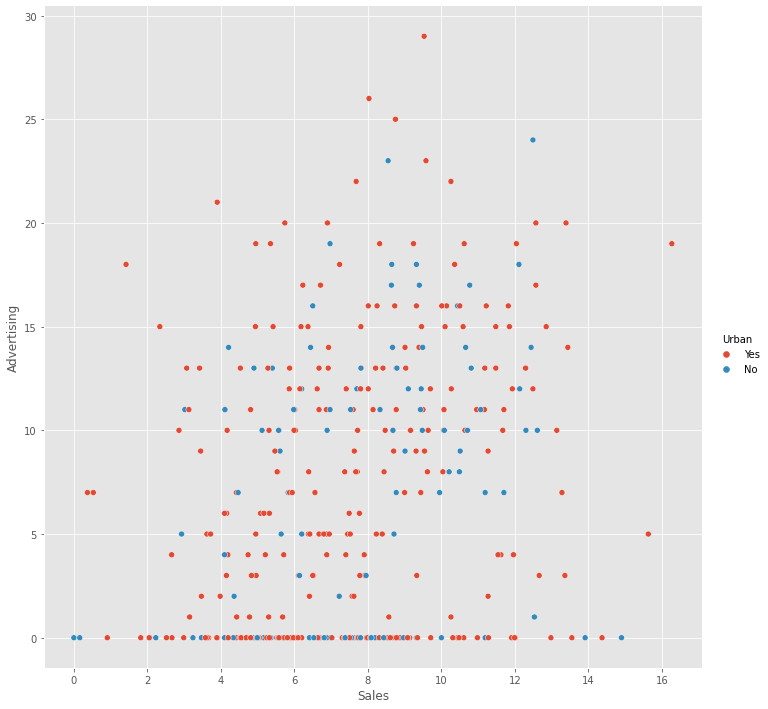

In [8]:
sns.pairplot(data=df,x_vars="Sales",y_vars="Advertising",hue="Urban",height=10,aspect=1);

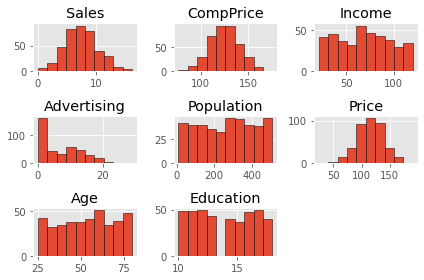

In [9]:
df.hist(edgecolor='k')
plt.tight_layout();

### Check for Missing Values

In [10]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Corelation Analysis

In [11]:
corel=np.round(df.corr(),2)
corel

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.00,0.06,0.15,0.27,0.05,-0.44,-0.23,-0.05
CompPrice,0.06,1.00,-0.08,-0.02,-0.09,0.58,-0.10,0.03
Income,0.15,-0.08,1.00,0.06,-0.01,-0.06,-0.00,-0.06
Advertising,0.27,-0.02,0.06,1.00,0.27,0.04,-0.00,-0.03
Population,0.05,-0.09,-0.01,0.27,1.00,-0.01,-0.04,-0.11
Price,-0.44,0.58,-0.06,0.04,-0.01,1.00,-0.10,0.01
Age,-0.23,-0.10,-0.00,-0.00,-0.04,-0.10,1.00,0.01
Education,-0.05,0.03,-0.06,-0.03,-0.11,0.01,0.01,1.00


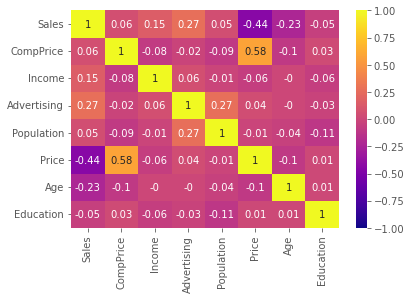

In [12]:
sns.heatmap(data=corel,vmin=-1,vmax=1,cmap='plasma',annot=True);

### Predictive Power score

In [13]:
import ppscore as pps 
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


### Preprocessing - Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[['ShelveLoc', 'Urban', 'US']]=df[['ShelveLoc', 'Urban', 'US']].apply(label.fit_transform)

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### Treating those who have Sales >5  as "High" and others are "Low"

In [16]:
df["Sales"]=np.where(df["Sales"]>5,"High","Low")

In [17]:
df["Sales"].value_counts()

High    323
Low      77
Name: Sales, dtype: int64

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,High,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


### Segregate the data into independent features and target feature since we are using sklearn librarby to build model

In [19]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

### Split the data into training and testing dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
y_train.value_counts()

High    257
Low      63
Name: Sales, dtype: int64

In [22]:
y_test.value_counts()

High    66
Low     14
Name: Sales, dtype: int64

### Building Random Forest Model 

In [23]:
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [24]:
y.unique()

array(['High', 'Low'], dtype=object)

### Predictions for Train and Test Dataset

In [25]:
# predict on the train and test data

pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)

In [26]:
pred_train[:5]

array(['High', 'High', 'Low', 'High', 'High'], dtype=object)

In [27]:
pred_test[:5]

array(['Low', 'Low', 'High', 'High', 'High'], dtype=object)

### Confusion Matrix for Train Dataset

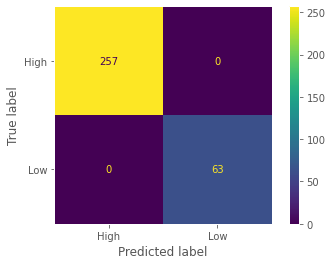

In [28]:
# plot the confusion matrix for train data

from sklearn.metrics import ConfusionMatrixDisplay
# Training daatset
ConfusionMatrixDisplay.from_predictions(y_train,pred_train,display_labels=y.unique())
plt.grid(False);


### Evaluation of model using Precision Score for Train Dataset

In [29]:
# Calculate precision score for train data
precision_train=precision_score(y_train,pred_train,pos_label="High")
precision_train

1.0

In [30]:
precision_train=precision_score(y_train,pred_train,pos_label="Low")
precision_train

1.0

### Confusion Matrix for Test Dataset

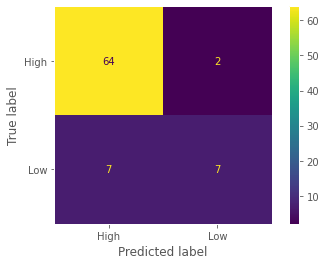

In [31]:
# Test Datset
ConfusionMatrixDisplay.from_predictions(y_test,pred_test,display_labels=y.unique())
plt.grid(False);


### Evaluation of model using Precision Score for Test Dataset

In [32]:
precision_test=precision_score(y_test,pred_test,pos_label="High")
precision_test

0.9014084507042254

In [33]:
precision_test=precision_score(y_test,pred_test,pos_label="Low")
precision_test

0.7777777777777778

#### Therefore this model is good in predicting the attributes which have high influence in Sales of the Company.

## Random Forest Model for Companies Sales-Numeric Target variable

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("ggplot")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score

In [35]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Preprocessing - Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[['ShelveLoc', 'Urban', 'US']]=df[['ShelveLoc', 'Urban', 'US']].apply(label.fit_transform)

In [37]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### Segregate the data into independent features and target feature since we are using sklearn librarby to build model

In [38]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

### Split the data into training and testing dataset

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
y_train.value_counts()

7.80     4
9.32     3
6.88     3
6.67     3
4.10     3
        ..
2.05     1
9.39     1
7.74     1
4.47     1
12.57    1
Name: Sales, Length: 275, dtype: int64

In [41]:
y_test.value_counts()

6.53     2
5.08     2
11.27    2
7.52     1
13.55    1
        ..
9.31     1
6.14     1
9.50     1
4.55     1
8.75     1
Name: Sales, Length: 77, dtype: int64

### Building Random Forest Model 

In [42]:
rf=RandomForestRegressor(random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

### Predictions for Train and Test Dataset

In [43]:
pred_train_reg=rf.predict(x_train)
pred_test_reg=rf.predict(x_test)

In [44]:
pred_train_reg[:5]

array([ 7.6348, 13.3019,  4.5993,  8.3451,  7.652 ])

In [45]:
pred_test_reg[:5]

array([6.4871, 5.0054, 9.6198, 5.2266, 8.2219])

### Evaluation of model using RSqaure Score for Train Dataset

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
r2_train=r2_score(y_train,pred_train_reg)
r2_test=r2_score(y_test,pred_test_reg)
r2_train,r2_test 

(0.9510414284884388, 0.6810741753735117)

### Evaluation of model using RMSE Score for Test Dataset

In [47]:
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train_reg))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test_reg))
rmse_train,rmse_test

(0.6023996180900177, 1.776556933509309)